# Squin gates of interest

given immutable lists `q: IList[Qubit, Literal[7]]` of qubits, and `p: float` noise rate

### Depolarizing noise channels

In [13]:
from bloqade import squin
from kirin.dialects.ilist import IList
import numpy as np
import bloqade.stim
import bloqade.tsim

In [ ]:
#Generate MSD circuits given theta,phi injection
def MSD_encoding(theta, phi,basis="z"):

    @squin.kernel
    def parameterized_MSD_encoding():
        q = squin.qalloc(7)  # allocate qubits
        squin.u3(theta,phi,0,q[6])
        for i in range(6):
            squin.sqrt_y_adj(q[i])
        # [squin.broadcast.sqrt_y_adj(q[i]) for i in range(5)]
        squin.cz(q[1], q[2])
        squin.cz(q[3], q[4])
        squin.cz(q[5], q[6])
        squin.sqrt_y(q[6])
        squin.cz(q[0],q[3])
        squin.cz(q[2],q[5])
        squin.cz(q[4],q[6])
        for i in range(5):
            squin.sqrt_y(q[i+2])
        # [squin.broadcast.sqrt_y(q[i+2]) for i in range(5)]
        squin.cz(q[0],q[1])
        squin.cz(q[2],q[3])
        squin.cz(q[4],q[5])
        squin.sqrt_y(q[1])
        squin.sqrt_y(q[2])
        squin.sqrt_y(q[4])
        squin.broadcast.measure(q)
    
    return parameterized_MSD_encoding

In [ ]:
#plot vs phi
phi=np.linspace(0,2*np.pi,20)
y=[]
for i in phi:
    MSD_enc = MSD_encoding(np.pi/2, i,basis="z")
    tsim_circ = bloqade.tsim.Circuit(MSD_enc)
    sampler = tsim_circ.compile_sampler()
    samples = sampler.sample(shots=1000)
    #map 0 to 1 and 1 to -1
    result = 1 - 2 * samples.astype(int)
    #Average over shots
    y.append(np.mean(np.array([j[0]*j[1]*j[5] for j in result])))

Text(0.5, 1.0, 'Z basis vs phi')

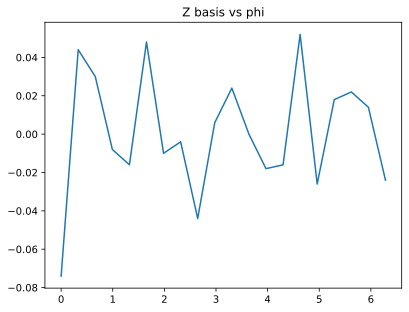

In [16]:
import matplotlib.pyplot as plt
phi=np.linspace(0,2*np.pi,20)
plt.plot(phi,y)
plt.title("Z basis vs phi")

In [ ]:
#MSD circuit for X basis
def MSD_encoding_X(theta, phi,basis="z"):

    @squin.kernel
    def parameterized_MSD_encoding():
        q = squin.qalloc(7)  # allocate qubits
        squin.u3(theta,phi,0,q[6])
        for i in range(6):
            squin.sqrt_y_adj(q[i])
        # [squin.broadcast.sqrt_y_adj(q[i]) for i in range(5)]
        squin.cz(q[1], q[2])
        squin.cz(q[3], q[4])
        squin.cz(q[5], q[6])
        squin.sqrt_y(q[6])
        squin.cz(q[0],q[3])
        squin.cz(q[2],q[5])
        squin.cz(q[4],q[6])
        for i in range(5):
            squin.sqrt_y(q[i+2])
        # [squin.broadcast.sqrt_y(q[i+2]) for i in range(5)]
        squin.cz(q[0],q[1])
        squin.cz(q[2],q[3])
        squin.cz(q[4],q[5])
        squin.sqrt_y(q[1])
        squin.sqrt_y(q[2])
        squin.sqrt_y(q[4])
        squin.broadcast.h(q)
        squin.broadcast.measure(q)
    
    return parameterized_MSD_encoding

MSD_enc = MSD_encoding_X(np.pi, 0)
stim_circ = bloqade.stim.Circuit(MSD_enc)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=100)
result = 1 - 2 * samples.astype(int)
import numpy as np
print(f"ExpVal:{np.mean(np.array([i[0]*i[1]*i[5] for i in result]))}")

ExpVal:-0.08


In [ ]:
#plot vs phi
phi=np.linspace(0,2*np.pi,20)
y=[]
for i in phi:
    MSD_enc = MSD_encoding_X(np.pi/2, i,basis="z")
    tsim_circ = bloqade.tsim.Circuit(MSD_enc)
    sampler = tsim_circ.compile_sampler()
    samples = sampler.sample(shots=1000)
    #map 0 to 1 and 1 to -1
    result = 1 - 2 * samples.astype(int)
    #Average over shots
    y.append(np.mean(np.array([j[0]*j[1]*j[5] for j in result])))

Text(0.5, 1.0, 'X-basis vs Phi')

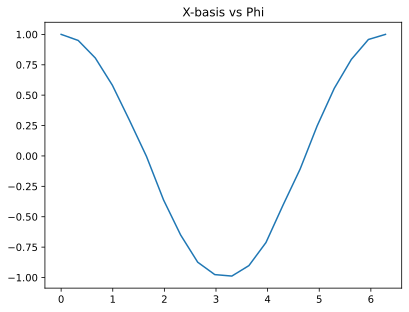

In [19]:
import matplotlib.pyplot as plt
phi=np.linspace(0,2*np.pi,20)
plt.plot(phi,y)
plt.title("X-basis vs Phi")